## Método de Interpolación a partir de la función acumulada 
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
%pylab inline
import numpy as np
import math
import pickle
import os
import scipy, scipy.signal
from matplotlib import pyplot
import scipy.stats as st
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy.optimize import fsolve
from scipy import integrate
from sympy import *
import random
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


### Se genera un conjunto de datos que siguen una distribución gaussiana aleatoria

$$P(x)=\frac{1}{\sqrt{2\pi }\sigma }e^{-\frac{x^{2}}{2\sigma^{2} }}$$

Ingrese cuantos numeros aleatorios desea obtener
1000


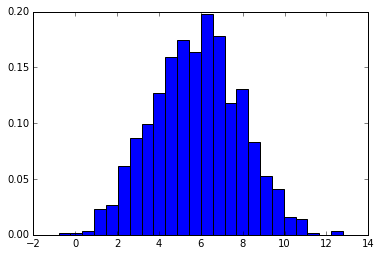

In [2]:
print("Ingrese cuantos numeros aleatorios desea obtener")
N=int(input())
mu=random.uniform(0,10.0)
sigma=random.uniform(0.0,5.0)
x = np.random.normal(mu, sigma, N)
plt.hist(x, bins='auto', normed = True, facecolor='blue', edgecolor='black')
plt.show()

In [3]:
def fcum(x):
    global ox
    ox = sort(x)
    I=np.ones(np.size(ox))
    M=np.triu(I)
    fc=np.dot(ox,M)
    global fcc
    fcc = fc/np.max(fc)
    #plt.plot(ox,fcc)
    global r 
    r = fcc, ox

### Se calcula la función de distribución acumulada

$F(x)=\int_{-\infty }^{x}f(x')dx'$

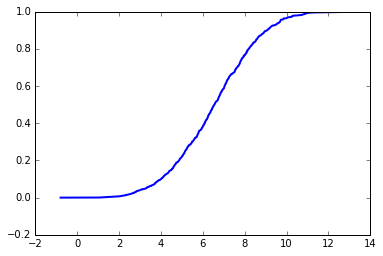

In [4]:
fcum(x)
plt.plot(ox,fcc, linewidth=2)
plt.show()

### Se ajusta una función polinomial diferenciable 

$F(x)=a_{o}+a_{1}x+a_{2}x^{2}+...+a_{n}x^{n}$

In [5]:
def delt(x):
    ajus = np.polyfit(fcc, ox, 9)
    func = np.poly1d(ajus)
    return func
def delt2():
    ajus2 = np.polyfit(ox, fcc, 9)
    func2 = np.poly1d(ajus2)
    return func2

In [6]:
def integr(x, c):
    x2 = lambda x: c
    integrate.quad(x2, -np.inf, delt(fx))
    return (4**3 / 3.)

### Se aproxima la función de distribución por medio de la derivada de $F(x)$

$\frac{\partial F(x)}{\partial x}=f(x)$

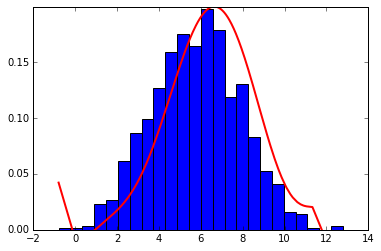

In [7]:
fdistr = np.zeros(np.size(ox))
for i in range(np.size(ox)):
        fx=np.random.uniform(0,1)
        #print(fx)
        #print(delt(fx))
        c=np.array([0.1])
        #x = Symbol('x')
        fprime = delt2().deriv()
        fdistr[i] = fprime(ox[i])
plt.plot(ox,fdistr,color='r', linewidth=2)
plt.hist(x,bins='auto', normed = True, facecolor='blue', edgecolor='black')
ylim(0.0,max(fdistr))
plt.show()        